# Logistic Regression

Today we're looking at logistic regression. This is a classification algorithm that is used to predict the probability of a binary outcome. It is a linear model, but it is not used for regression. Instead, it is used for classification.

## The Dataset

This dataset contains information of users in a social network. We're given the user id, the gender, the age and the estimated salary. A car company has just launched their brand new luxury SUV. We're trying to see which of these users of the social network are going to buy this brand-new SUV. The last column is a binary column that indicates whether the user bought the SUV or not.

In [94]:
import numpy as np

from ml_code.utils import load_data

data = load_data("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


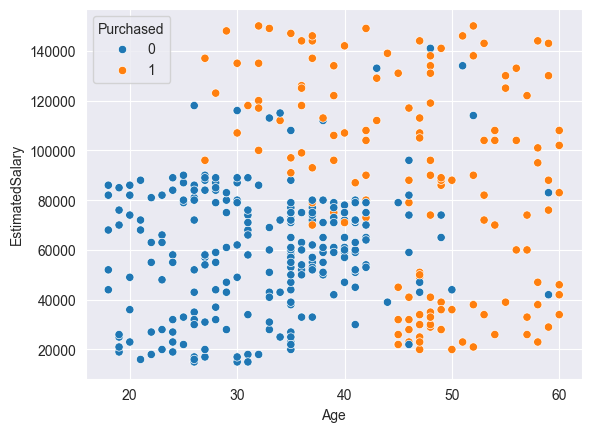

In [95]:
# Let's plot all the numerical data to see if we can see any patterns
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x="Age", y="EstimatedSalary", data=data, hue="Purchased")
plt.show()

Before considering the categorical columns, we can already see a clear distinction between the users who bought the SUV and those who didn't. This 'separation' implies a logistic regression model using the sigmoid function will be able to classify the users well.

## Preprocessing

We need to do a couple of things still - we can see there is a huge gap between the age and the estimated salary. It would be a good idea to scale these features. We could also encode the gender column, but for now we're going to focus on just the numerical columns.

In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Scale Age and EstimatedSalary, drop everything else
transformer = ColumnTransformer(
    transformers=[("scaler", StandardScaler(), ["Age", "EstimatedSalary"])],
    remainder="drop",
)

features = transformer.fit_transform(data)
target = data["Purchased"]

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.25, random_state=0
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 2), (100, 2), (300,), (100,))

## Training the Model

In [98]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Evaluating the Model

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred)

(array([[65,  3],
        [ 8, 24]]),
 0.89)

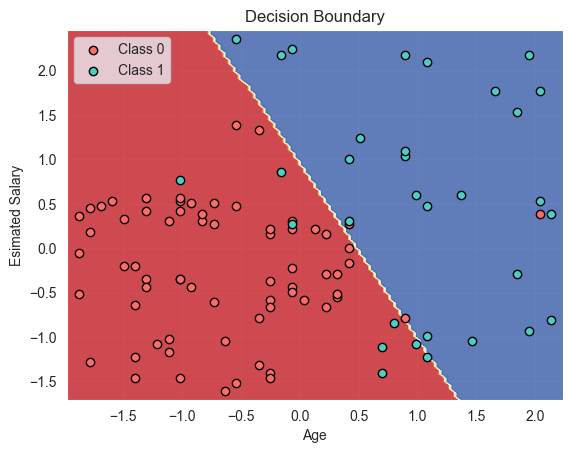

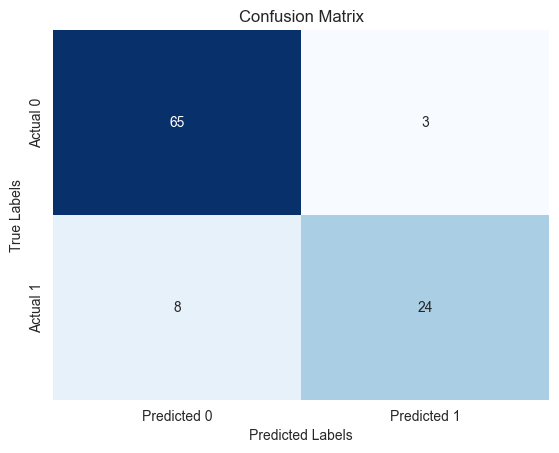

In [100]:
def plot_decision_boundary(X: np.ndarray, Y: np.ndarray, model: LogisticRegression):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Customize colors for the decision boundary plot
    cmap = plt.cm.RdYlBu  # Choose a colormap (e.g., RdYlBu, viridis, plasma)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)

    # Customize colors for the data points
    colors = ["#FF6B6B", "#4ECDC4"]  # Choose distinct colors for each class
    for i, color in zip(np.unique(Y), colors):
        plt.scatter(
            X[Y == i, 0], X[Y == i, 1], c=color, label=f"Class {i}", edgecolor="k"
        )

    plt.xlabel("Age")
    plt.ylabel("Esimated Salary")
    plt.title("Decision Boundary")
    plt.legend()
    plt.show()


def plot_confusion_matrix(y_t, y_p):
    cm = confusion_matrix(y_t, y_p)
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        xticklabels=["Predicted 0", "Predicted 1"],
        yticklabels=["Actual 0", "Actual 1"],
    )
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()


# Plot the decision boundary
plot_decision_boundary(X_test, y_test, model)

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred)

## Conclusion

We can see the model has done fairly well at classifying the users in the test dataset. The confusion matrix shows that the model has only misclassified 11 users. The decision boundary plot shows that the model has done a good job at separating the users who bought the SUV from those who didn't.